In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

os.chdir("../")
from pathlib import Path
import matplotlib.gridspec as gridspec

In [2]:
with open("settings.txt") as f:
    settings_dict = json.load(f)
seed_val = settings_dict["seed_choice"]
np.random.seed(seed_val)
sns_dict = settings_dict["sns_dict"]
sns.set_theme(**sns_dict)

In [3]:
all_metrics = settings_dict["all_metrics"]

In [4]:
features = pd.read_parquet("data/allfeatures.parquet")
features["class"].value_counts()

class
EB      98473
RRL     45096
DSCT     8245
CEP      1662
Name: count, dtype: int64

In [5]:
colors = ["g-r", "r-i", "i-z"]
features = features.dropna(subset=colors)

In [6]:
features["class"].value_counts()

class
EB      50278
RRL     42698
DSCT     7756
CEP       683
Name: count, dtype: int64

In [7]:
# features = features.groupby("class").sample(n=1660, random_state=seed_val)

## 1. Scatter/histogram b/w individual features

In [8]:
corr_matrix = features.drop(["class"], axis=1).corr()

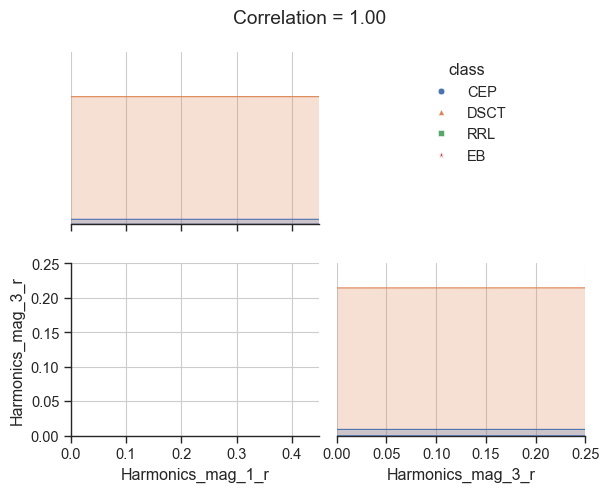

In [9]:
vars_interest = ["Harmonics_mag_1_r", "Harmonics_mag_3_r"]
corr_val = corr_matrix.loc[vars_interest[0], vars_interest[1]]
ax = sns.pairplot(
    features,
    vars=vars_interest,
    hue="class",
    corner=True,
    markers=["o", "^", "s", "*"],
)
plt.suptitle(f"Correlation = {corr_val:.2f}")
plt.tight_layout()
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.675, 0.9))
# https://stackoverflow.com/a/34579525/10743245

var1_lims = (0, 0.45)
var2_lims = (0, 0.25)

ax.axes.ravel()[0].set_xlim(*var1_lims)
ax.axes.ravel()[2].set_xlim(*var1_lims)
ax.axes.ravel()[2].set_ylim(*var2_lims)
ax.axes.ravel()[3].set_xlim(*var2_lims)

plt.show()

In [10]:
corr_thresh = 0.9
corr_matrix = corr_matrix.abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype("bool"))
upper = upper[upper >= corr_thresh].dropna(axis=1, how="all")
upper = upper.sort_values(by=list(upper.columns), ascending=False)

In [11]:
lists = []

for idx in upper.index:
    row = upper.loc[idx].dropna()
    ls = sorted(list(row.index) + [row.name])
    lists.append(ls)

In [12]:
# lists = [[1, 3], [3, 5], [5, 6], [7, 8]]
merged = []
for lst in lists:
    for m in merged:
        if any(item in m for item in lst):
            m.extend(lst)
            break
    else:
        merged.append(lst)

merged_alt = []
for m in merged:
    merged_alt.append(list(set(m)))
merged = merged_alt
# print(merged)

In [13]:
for m in merged:
    if len(m) > 1:
        print("\n\t".join(m))
        print("*" * 10)

MHPS_low_g
	MHPS_high_g
**********
MHPS_non_zero_z
	MHPS_non_zero_r
	MHPS_non_zero_g
	MHPS_non_zero_u
	MHPS_non_zero_i
**********
MHPS_low_i
	MHPS_high_i
	ExcessVar_flux_i
**********
delta_period_u
	Multiband_period
**********
Harmonics_mag_4_u
	Harmonics_mag_5_u
	Harmonics_mag_2_u
	Harmonics_mag_6_u
	Harmonics_mag_3_u
	Harmonics_mag_1_u
**********
Harmonics_mag_2_g
	Harmonics_mag_1_g
**********
Harmonics_mag_7_g
	Harmonics_mag_5_g
	Harmonics_mag_6_g
	Harmonics_mag_3_g
	Harmonics_mag_4_g
**********
Harmonics_mag_6_r
	Harmonics_mag_4_r
	Harmonics_mag_2_r
	Harmonics_mag_3_r
	Harmonics_mag_5_r
	Harmonics_mag_7_r
	Harmonics_mag_1_r
**********
Harmonics_mag_6_i
	Harmonics_mag_4_i
	Harmonics_mag_7_i
	Harmonics_mag_3_i
	Harmonics_mag_5_i
	Harmonics_mag_1_i
	Harmonics_mag_2_i
**********
Harmonics_mag_6_z
	Harmonics_mag_5_z
	Harmonics_mag_7_z
	Harmonics_mag_2_z
	Harmonics_mag_4_z
	Harmonics_mag_1_z
	Harmonics_mag_3_z
**********
Harmonics_mag_2_Y
	Harmonics_mag_6_Y
	Harmonics_mag_1_Y
	Harmonics_

In [14]:
choose_corrfeats = []
for m in merged:
    print(m)
    features[m].isna()
    argmin_feat = features[m].isna().sum().argmin()
    feat_chosen = m[argmin_feat]
    choose_corrfeats.append(feat_chosen)
    print(feat_chosen)
    print("*" * 20)

['MHPS_low_g', 'MHPS_high_g']
MHPS_low_g
********************
['MHPS_non_zero_z', 'MHPS_non_zero_r', 'MHPS_non_zero_g', 'MHPS_non_zero_u', 'MHPS_non_zero_i']
MHPS_non_zero_r
********************
['MHPS_low_i', 'MHPS_high_i', 'ExcessVar_flux_i']
ExcessVar_flux_i
********************
['delta_period_u', 'Multiband_period']
Multiband_period
********************
['Harmonics_mag_4_u', 'Harmonics_mag_5_u', 'Harmonics_mag_2_u', 'Harmonics_mag_6_u', 'Harmonics_mag_3_u', 'Harmonics_mag_1_u']
Harmonics_mag_4_u
********************
['Harmonics_mag_2_g', 'Harmonics_mag_1_g']
Harmonics_mag_2_g
********************
['Harmonics_mag_7_g', 'Harmonics_mag_5_g', 'Harmonics_mag_6_g', 'Harmonics_mag_3_g', 'Harmonics_mag_4_g']
Harmonics_mag_7_g
********************
['Harmonics_mag_6_r', 'Harmonics_mag_4_r', 'Harmonics_mag_2_r', 'Harmonics_mag_3_r', 'Harmonics_mag_5_r', 'Harmonics_mag_7_r', 'Harmonics_mag_1_r']
Harmonics_mag_6_r
********************
['Harmonics_mag_6_i', 'Harmonics_mag_4_i', 'Harmonics_mag_7_

In [15]:
len(choose_corrfeats)

332

In [16]:
# # manually choose one from each subset
# # edit - choose the one with the highest SNR or the one with the STD
# # alternate programmatic approach - look at diff clusters
# choose_corrfeats = [
#     "median_brightness_before_band_r",
#     "Meanvariance_flux_r",
#     "Period_band_Y",
#     "MHPS_ratio_Y",
#     "Multiband_period",
#     "Harmonics_mag_1_u",
#     "Harmonics_mag_1_g",
#     "Harmonics_mag_1_r",
#     "Harmonics_mag_1_z",
#     "Amplitude_flux_u",
#     "Amplitude_flux_g",
#     "Amplitude_flux_r",
#     "Meanvariance_flux_g",
#     "Amplitude_flux_i",
#     "ExcessVar_flux_i",
#     "Meanvariance_flux_z",
#     "Amplitude_flux_z",
#     "Amplitude_flux_Y",
#     "SPM_t0_r",
#     "Mean_flux_u",
#     "n_forced_phot_band_after_z",
#     "n_forced_phot_band_before_r",
#     "dbrightness_first_det_band_r",
#     "dbrightness_first_det_band_i",
#     "dbrightness_first_det_band_z",
#     "dbrightness_first_det_band_Y",
# ]

In [17]:
bigset = []
for m in merged:
    if len(m) > 1:
        bigset.append(m)
bigset = [item for subset in bigset for item in subset]

drop_corrfeats = list(set(bigset) - set(choose_corrfeats))

In [18]:
import missingno as msno

In [19]:
features[["class"]]

,class
snid,
1067946,CEP
1339295,CEP
2367215,CEP
2497903,CEP
2696180,CEP
...,...
159474435,EB
159480859,EB
159485253,EB


In [20]:
(
    features.loc[:, colors + choose_corrfeats + ["class"]]
    .isna()
    .sum()
    .sort_values(ascending=False)
).iloc[:40]

Period_band_u                      101094
Harmonics_chi_u                     99082
dbrightness_first_det_band_u        98413
Harmonics_phase_7_u                 96799
Harmonics_mse_u                     96799
Harmonics_phase_2_u                 96799
Harmonics_phase_3_u                 96799
Harmonics_phase_4_u                 96799
Harmonics_mag_4_u                   96799
Harmonics_phase_5_u                 96799
Harmonics_phase_6_u                 96799
Harmonics_mag_7_u                   96799
MHPS_low_u                          89638
MHPS_ratio_u                        89638
MHPS_PN_flag_u                      89638
max_brightness_before_band_u        86249
last_brightness_before_band_u       86249
median_brightness_before_band_g     85885
last_brightness_before_band_g       85885
max_brightness_before_band_g        85885
dbrightness_first_det_band_g        85885
dbrightness_forced_phot_band_Y      85149
dbrightness_forced_phot_band_r      82743
last_brightness_before_band_r     

In [22]:
smallfeatures = features.loc[:, colors + choose_corrfeats + ["class"]].dropna(axis=1)

In [40]:
# drop duplicated cols
smallfeatures = smallfeatures.loc[:, ~smallfeatures.columns.duplicated()].copy()

In [41]:
smallfeatures.groupby("class").count()

,g-r,r-i,i-z,Multiband_period,Harmonics_mag_6_r,Harmonics_mag_6_i,Harmonics_mag_6_z,SPM_t0_Y,positive_fraction_i,PPE,...,SPM_tau_fall_Y,SPM_chi_r,SPM_chi_i,SPM_chi_z,positive_fraction_g,positive_fraction_z,Timespan,Coordinate_x,Coordinate_y,Coordinate_z
class,,,,,,,,,,,,,,,,,,,,,
CEP,683,683,683,683,683,683,683,683,683,683,...,683,683,683,683,683,683,683,683,683,683
DSCT,7756,7756,7756,7756,7756,7756,7756,7756,7756,7756,...,7756,7756,7756,7756,7756,7756,7756,7756,7756,7756
EB,50278,50278,50278,50278,50278,50278,50278,50278,50278,50278,...,50278,50278,50278,50278,50278,50278,50278,50278,50278,50278
RRL,42698,42698,42698,42698,42698,42698,42698,42698,42698,42698,...,42698,42698,42698,42698,42698,42698,42698,42698,42698,42698


In [42]:
smallfeatures.to_parquet("data/reduced_features_LATEST.parquet")

In [43]:
smallfeatures.groupby("class").sample(683).to_parquet(
    "data/reduced_balancedfeatures_LATEST.parquet"
)

<Axes: >

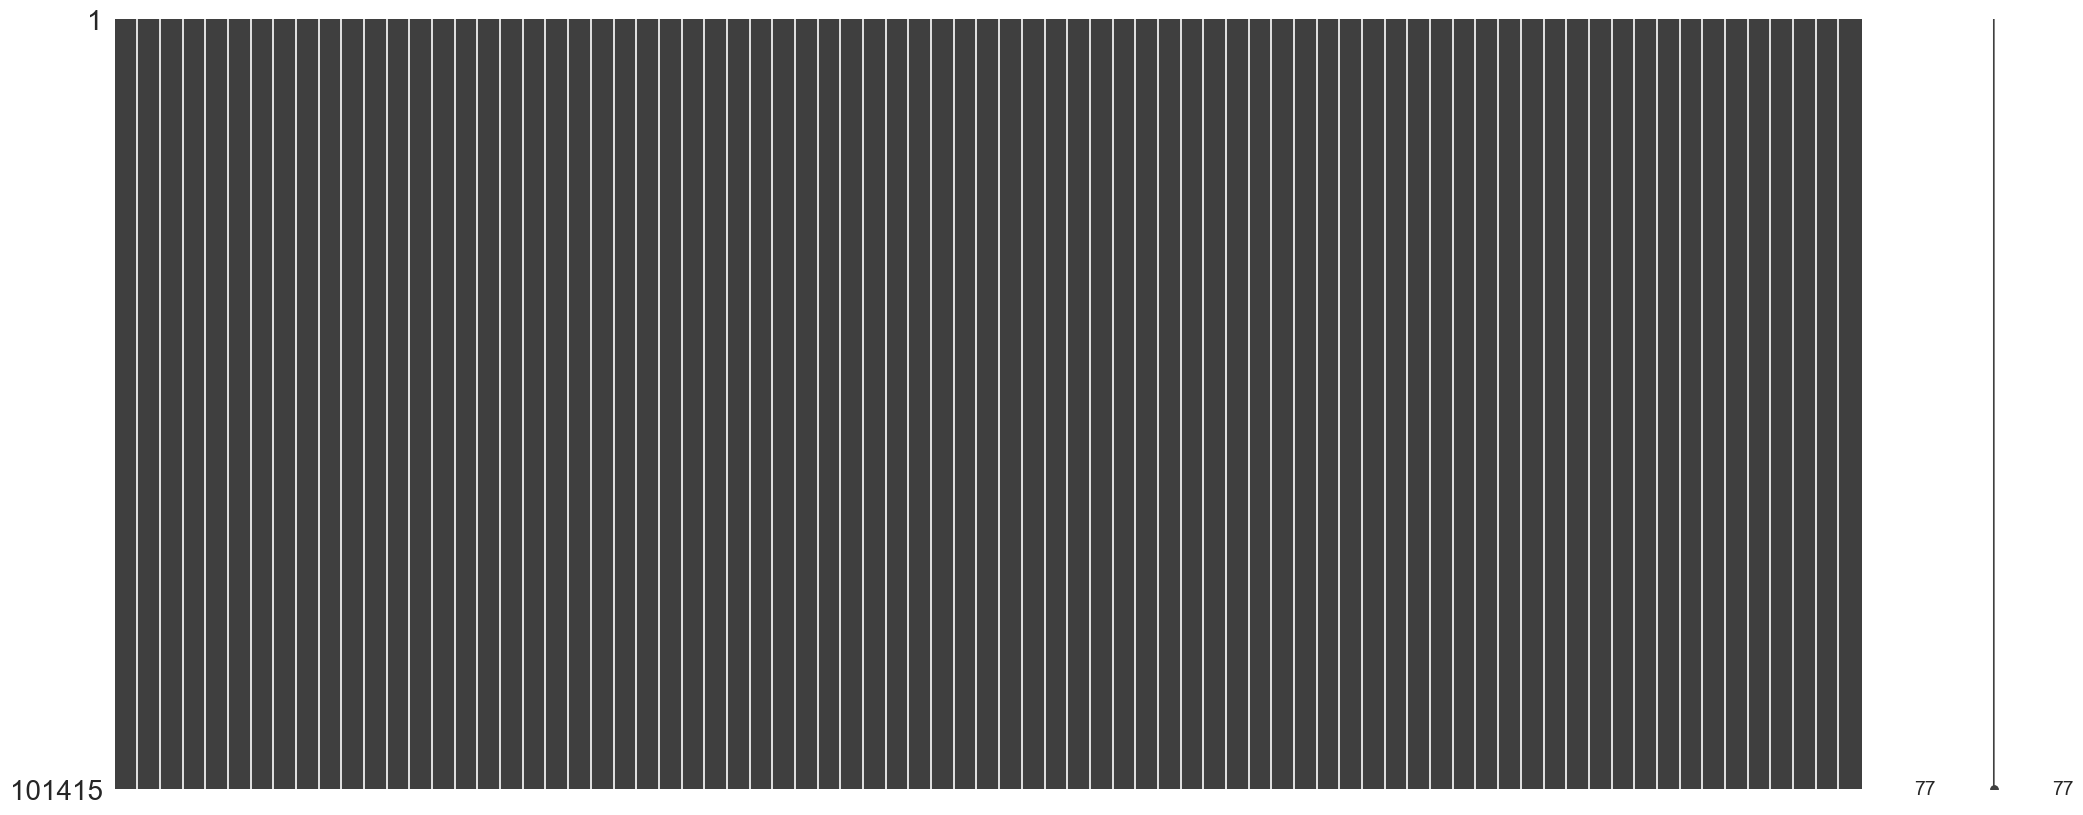

In [44]:
msno.matrix(smallfeatures)

In [45]:
len(drop_corrfeats)

87

In [46]:
# # drop_features = (
# #     + list(sorted(bad_features))
# #     + list(sorted(drop_corrfeats))
# # )

# # Drop duplicates while preserving order
# drop_features = list(dict.fromkeys(drop_corrfeats))